This is a _working_ notebook. See the `ccdControlIntro` notebook for a more narrative how-to. In this notebook, most cells have acquisition, processing, and plotting.

In [1]:
# All system imports
import time
import clocks

import numpy as np
import scipy
import scipy.optimize as opt

import matplotlib.pyplot as plt
%matplotlib inline

In [35]:
# FEE connection and initialization.
# Initialize everything to some sane state.
import fee.feeControl as feeMod
reload(feeMod)

fee = feeMod.FeeControl(logLevel=20)
fee.powerUp()
time.sleep(1)

connected to FEE, revision PFS BEE Rev-, copyright JHU
SUCCESS
SUCCESS
SUCCESS


In [36]:
for v in ('3V3M', '3V3', '5VP', '5VN', '5VPpa', '5VNpa', '12VP', '12VN', '24VN', '54VP'):
    print("%s = %s" % (v, fee.raw('gv,%s' % (v))))

3V3M = 3.30
3V3 = 3.29
5VP = 4.97
5VN = -4.88
5VPpa = 4.98
5VNpa = -4.91
12VP = 11.61
12VN = -11.52
24VN = -23.05
54VP = 49.41


In [83]:
# FPGA connection and initialization.
# All the reloads are to make sure that new code gets picked up
import fpga as fpgaMod
import fpga.ccdFuncs as ccdFuncs
import fpga.nbFuncs as nbFuncs

reload(fpgaMod)
reload(fpgaMod.ccd)
reload(fpgaMod)

ccd = fpgaMod.CCD(adc18bit=2)  # adc18bit=2 reads the low bits.
ccd.pciReset()
print "FPGA version: 0x%08x" % (ccd.peekWord(0))

FPGA version: 0xbeefa070


In [68]:
# Load the clock tables. pfsClocks is used for each readout.
import clocks_001
import clocks_002
import clocks
reload(clocks_001)
reload(clocks_002)
reload(clocks)

pfsClocks = clocks_002.standardClocks
pre, pix, post = pfsClocks()


0100 65375.3 65420.3 65424.5 65404.7 65462.0 65323.0 65386.3 65416.6 1.12 1.08 1.10 1.07 1.05 0.99 1.05 1.12 OK
0199 65375.2 65420.5 65424.5 65404.6 65461.9 65322.9 65386.4 65416.6 1.14 1.10 1.08 1.02 1.15 1.03 1.02 1.04 OK
0100 65375.1 65420.2 65424.4 65404.4 65461.8 65322.6 65386.2 65416.4 1.13 1.08 1.04 1.03 1.04 1.00 1.05 1.06 OK
0199 65375.1 65420.2 65424.2 65404.4 65461.7 65322.5 65386.1 65416.3 1.11 1.05 1.07 1.11 1.13 1.00 1.10 1.10 OK
!!!! unwraping 857600 pixels !!!!
means(0.000): [-159.8663 -114.7827 -110.6857 -130.5476 -73.3169 -212.3275 -148.9569 -118.6339]
devs (0.000): [1.1359 1.0264 1.0787 0.9749 1.0910 1.0134 1.0375 1.0801]

0100 1429.8 1489.6 1447.5 1400.3 1493.8 1386.8 1541.1 1453.5 1.10 1.15 1.03 1.04 1.16 1.03 1.06 1.06 OK
0199 1429.7 1489.5 1447.5 1400.4 1494.0 1387.0 1541.2 1453.6 1.08 1.07 1.03 1.06 1.13 1.01 1.01 1.08 OK
!!!! unwraping 8 pixels !!!!
means(0.020): [1429.8063 1489.5287 1447.4036 1400.3852 1494.0027 1386.7132 1541.0487 1453.4564]
devs (0.020): [1.

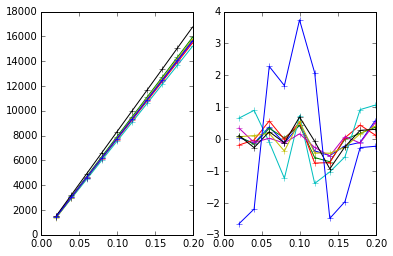

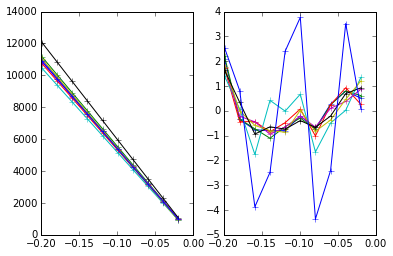

In [58]:
reload(nbFuncs)
doGainCurve = True
if doGainCurve:
    steps = 0.0199
    statCols = slice(5,None)
    amps = np.arange(8)
    noffsets, nlevels = nbFuncs.gainCurve(ccd, fee, amps=amps, stepSize=steps, leg='n', statCols=statCols, doUnwrap=True)
    poffsets, plevels = nbFuncs.gainCurve(ccd, fee, amps=amps, stepSize=-steps, leg='p', statCols=statCols, doUnwrap=True)
    
    print
    nfits = nbFuncs.plotGains(noffsets, nlevels, amps=amps)
    print
    pfits = nbFuncs.plotGains(poffsets, plevels, amps=amps)

In [7]:
#nlev = np.array(levels)
#noff = np.array(offsets).reshape(len(offsets),1)
#nn = np.hstack((noff,nlev))
#np.savetxt('noff.txt', nn, delimiter=',',fmt="%0.3f")
#np.savetxt('poff.txt', pp, delimiter=',',fmt="%0.3f")

In [62]:
# Run this to take the current N- offsets, and apply half to N- and half to N+ (opposite sign)
fee.zeroLevels(leg='p')
#fee.zeroLevels()
#fee.setLevels(range(8), offs)
#fee.setLevels(range(8), [0.014]*8, leg='n')
#fee.setLevels(range(8), [-0.02]*8, leg='p')
#fee.setLevels(range(8), [-0.02]*8, leg='p')
#fee.setLevels(range(8), [-0.02]*8, leg='p')
print offs

DEBUG:root:sending command :'~so,0p,ch0,0.00000\r':
DEBUG:root:ignoring '\n'
DEBUG:root:received :~so,0p,ch0,0.00000:
DEBUG:root:received :SUCCESS:
DEBUG:root:raw received :SUCCESS:
DEBUG:root:sending command :'~so,1p,ch0,0.00000\r':
DEBUG:root:ignoring '\n'
DEBUG:root:received :~so,1p,ch0,0.00000:
DEBUG:root:received :SUCCESS:
DEBUG:root:raw received :SUCCESS:
DEBUG:root:sending command :'~so,2p,ch0,0.00000\r':
DEBUG:root:ignoring '\n'
DEBUG:root:received :~so,2p,ch0,0.00000:
DEBUG:root:received :SUCCESS:
DEBUG:root:raw received :SUCCESS:
DEBUG:root:sending command :'~so,3p,ch0,0.00000\r':
DEBUG:root:ignoring '\n'
DEBUG:root:received :~so,3p,ch0,0.00000:
DEBUG:root:received :SUCCESS:
DEBUG:root:raw received :SUCCESS:
DEBUG:root:sending command :'~so,0p,ch1,0.00000\r':
DEBUG:root:ignoring '\n'
DEBUG:root:received :~so,0p,ch1,0.00000:
DEBUG:root:received :SUCCESS:
DEBUG:root:raw received :SUCCESS:
DEBUG:root:sending command :'~so,1p,ch1,0.00000\r':
DEBUG:root:ignoring '\n'
DEBUG:root:re

[ 0.01446202  0.01368847  0.0141217   0.0145392   0.0135475   0.01473606
  0.01352902  0.01387551]


In [90]:
%pdb off
reload(ccdFuncs)
reload(nbFuncs)

allAmps = np.arange(8)
goodAmps = allAmps
badAmps = []

startStep = np.zeros(8) + 0.02
ncols=300

doTune = False
if doTune:
    offs, devs, gains = nbFuncs.tuneLevels(ccd, fee, levels=1000, adjOffset=5, 
                                           statCols=slice(-1,None), 
                                           maxLoops=10, nrows=200, 
                                           startStep=startStep, 
                                           startOffset=startStep,
                                           sigTol=4, 
                                           clockFunc=pfsClocks, 
                                           legs='n', useGains=nfits[:,0], 
                                           doZero=True, doUnwrap=True)

    defOffsets = offs
else:
    #defOffsets = np.array([0.014]*8) # np.array([0.0151, 0.0143, 0.0147, 0.0152, 0.0142, 0.0154, 0.0141, 0.0146])
    defOffsets = np.array([ 0.01451845,  0.013661  ,  0.01417135,  0.01452966,  0.01361041,
                        0.01478998,  0.01354483,  0.01394046])
    offs = defOffsets
    fee.zeroLevels()
    fee.setLevels(range(8), defOffsets)

Automatic pdb calling has been turned OFF


means: [1004.829 994.996 1008.314 994.285 1006.742 993.110 1003.693 993.746]
devs:  [0.985 1.035 1.061 1.002 0.984 1.030 1.041 1.096]
file: /data/pfs/2015-04-14/PFSA-00000760.fits


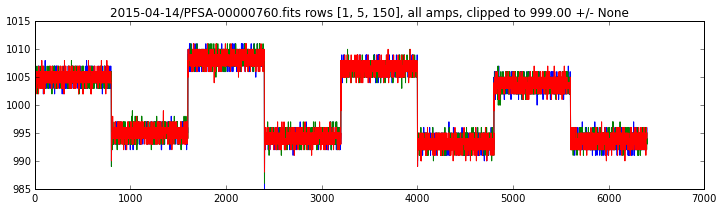

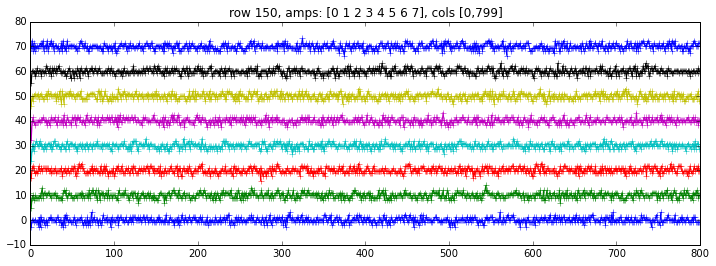

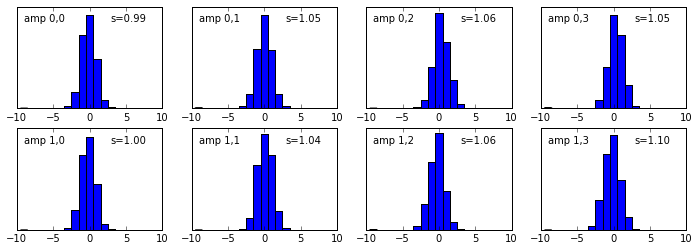

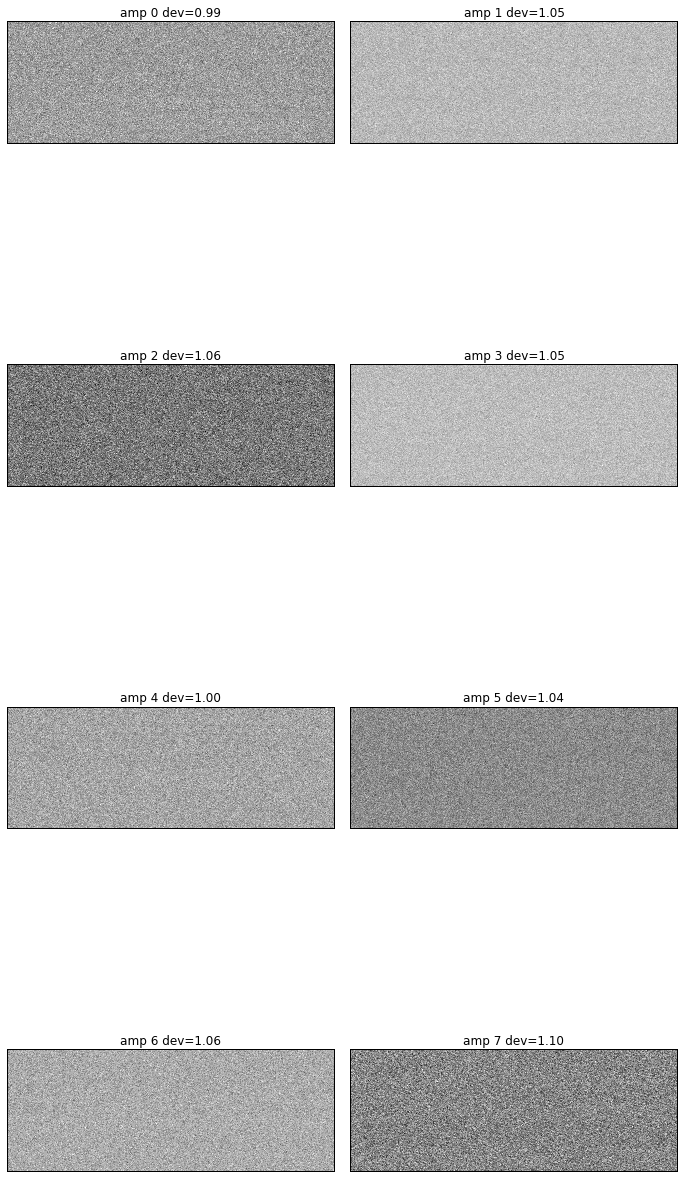

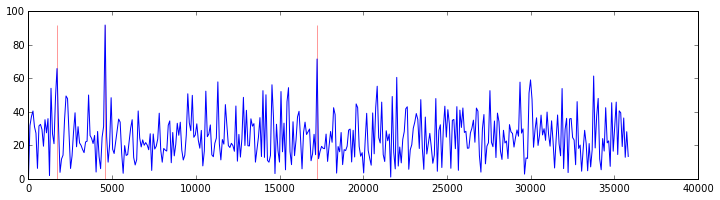

4579.7Hz -- 91.9
17241.4Hz -- 71.6
1706.2Hz -- 65.9


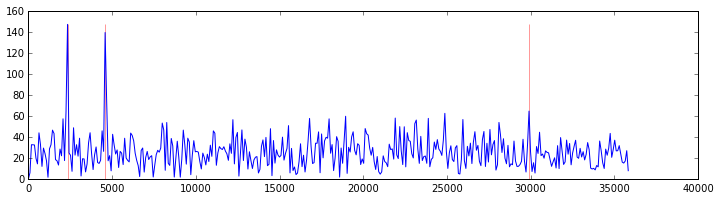

2334.8Hz -- 147.6
4579.7Hz -- 139.8
29903.0Hz -- 64.7


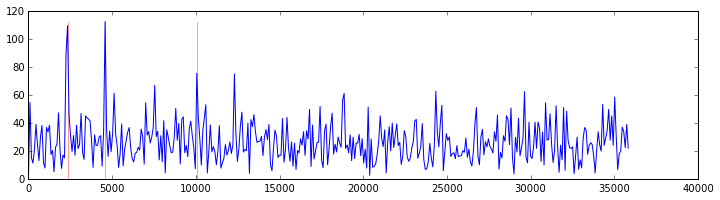

4579.7Hz -- 112.7
2334.8Hz -- 109.7
10057.5Hz -- 75.6


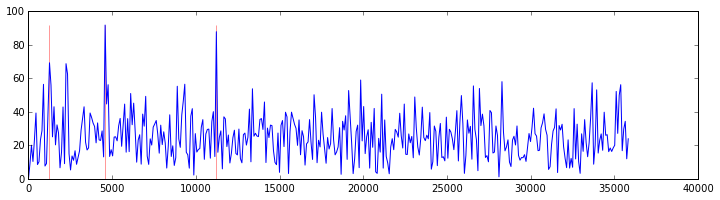

4579.7Hz -- 91.8
11224.9Hz -- 87.9
1257.2Hz -- 69.3


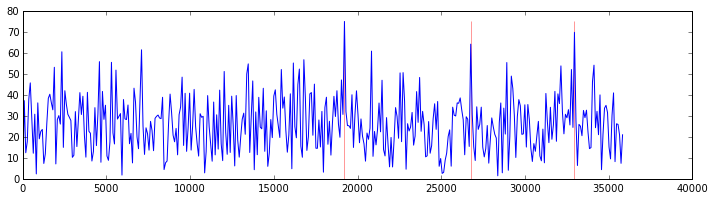

19217.0Hz -- 75.2
32956.2Hz -- 70.0
26760.1Hz -- 64.3


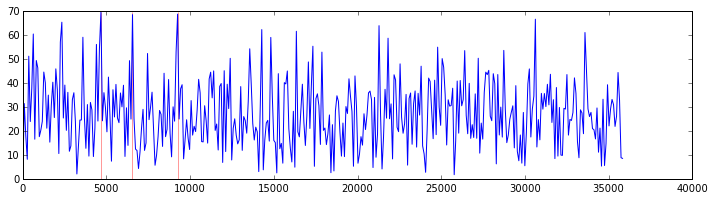

4669.5Hz -- 69.7
9249.3Hz -- 68.9
6555.3Hz -- 68.7


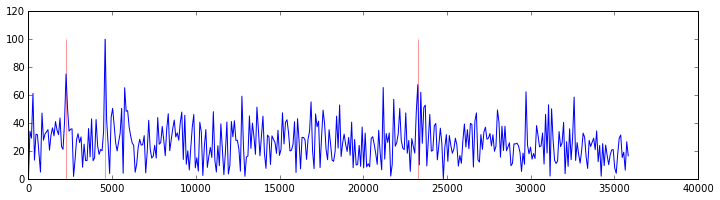

4579.7Hz -- 100.1
2245.0Hz -- 75.1
23257.9Hz -- 67.5


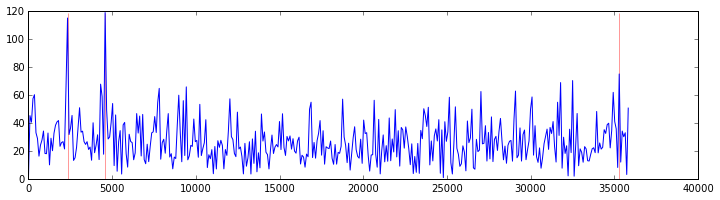

4579.7Hz -- 119.2
2334.8Hz -- 115.3
35290.9Hz -- 75.2


In [95]:
reload(ccdFuncs)
reload(nbFuncs)

reload(clocks_002)
reload(clocks)
pfsClocks = clocks_002.standardClocks

nrows = 300                # How many rows to read out.
ncols = 800
pcols = np.arange(ncols)   # Which cols to plot
prow = (nrows+1)/2
prows = [1, 5, prow]       # which rows to plot
fftAmps = []
dropRows = 1

figWidth = 12

argDict = dict(everyNRows=nrows-1, ampList=goodAmps, cols=pcols, ccd=ccd)

im, files = ccd.readImage(nrows=nrows, ncols=ncols, 
                          rowFunc=False, rowFuncArgs=argDict, 
                          clockFunc=pfsClocks)
im = im.astype('i4')
hi_w = np.where(im > 60000)
im[hi_w] -= 65535
#amp6Mask = ccd.ampidx(6, im)
#im[:, amp6Mask] -= im[:, amp6Mask].mean()
#im[:, amp6Mask] += im[:, ccd.ampidx(4, im)].mean()

means,devs = nbFuncs.ampStats(im, ccd=ccd, cols=np.arange(10,ncols))
print "means:", nbFuncs.fmtArr(means, format="%0.3f")
print "devs: ", nbFuncs.fmtArr(devs, format="%0.3f")

if dropRows > 0:
    im = im[:-dropRows]
# print "shape: %s dtype: %s" % (str(im.shape), im.dtype)
    
path = files[0]
imName = '/'.join(path.split('/')[-2:])
print "file: %s" % (path)

#focusAmp = 0             # Which amp to focus on
#focusMask = ccd.ampidx(focusAmp, im)[pcols]

# plot one or more rows across the entire image
nbFuncs.plotRows(im, prows, imName=imName, figWidth=figWidth, pixRange=None)

# plot one row for each the "good" amps
nbFuncs.plotAmps(im, amps=goodAmps, row=prow, cols=pcols, plotOffset=10, figWidth=figWidth)

# plot any bad amps individually
for a in badAmps:
    nbFuncs.plotAmps(im, amps=[a], row=prow, cols=pcols, figWidth=figWidth)

# show a grid of histograms.
hists = nbFuncs.ampHistGrid(im, ccd, cols=pcols, histRange=20, figWidth=figWidth)

# show a grid of raw amp images.
nbFuncs.rawAmpGrid(im, ccd, cols=pcols, figWidth=figWidth)

fftAmps = np.arange(8) # [1,2,5] # [5,6]
if len(fftAmps) > 0:    
    
    fftFig = plt.figure(figsize=(figWidth, figWidth/4))
    for a in fftAmps:
        fftFig = plt.figure(figsize=(figWidth, figWidth/4))
        fftMask = ccd.ampidx(a, im)[pcols]
        ampSeg = im[prow,fftMask]
        freqs, fft, peak_ii = ccdFuncs.plotTopPeriods(ampSeg, topN=3)


#fig.colorbar(pp)
#plt.tight_layout()

0: 00056019 00057966
1: 00035634 00073799
2: 00019762 00037166
3: 00019666 00119537
4: 00099934 00000001
5: 00119600 00119600
6: 00119600 00119600
7: 00119600 00119600
8: 00119600 00119600
9: 00119600 00119600
10: 00000000 00000000
11: 00000000 00000000
12: 00000000 00000000
13: 00000000 00000000
14: 00000000 00000000
15: 00000000 00000000
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 

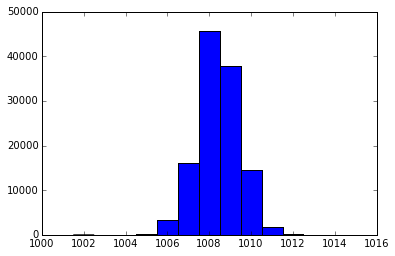

In [66]:
a0 = im[:,ccd.ampidx(0, im)]
a2 = im[:,ccd.ampidx(2, im)]

plt.hist(a0.flat, bins=np.arange(14)-6.5+np.median(a0))

for i in range(16):
    print "%d: %08d %08d" % (i, ((a0 & (1<<i)) > 0).sum(), ((a2 & (1<<i)) > 0).sum()) 

#plt.figure()
#plt.imshow(a0)
#plt.plot(np.where(a0 & 0x1),'.')
#yy,xx = np.where(a0 & 0x1)
#print np.unique(xx)
